# Getting started with python for geoprocessing and remote sensing

Let's start by importing the necessary packages

In [5]:
from descarteslabs.client.services import Places
import descarteslabs as dl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import shapely
from cartopy.mpl.gridliner
import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [8]:
%matplotlib inline

Using the DescartesLabs API to search for city and state shapes

In [9]:
resultsTL = Places().find('tres-lagoas')
resultsMS = Places().search('mato_grosso_do_sul')

The results are convert in geojson shapes

In [10]:
aoi = resultsTL[0]
shapeTL = dl.places.shape(aoi['slug'], geom='low')
bboxTL = shapeTL['bbox']

aoi = resultsMS[0]
shapeMS = dl.places.shape(aoi['slug'], geom='low')
bboxMS = shapeMS['bbox']

Plots the municipal and state boundaries using cartopy

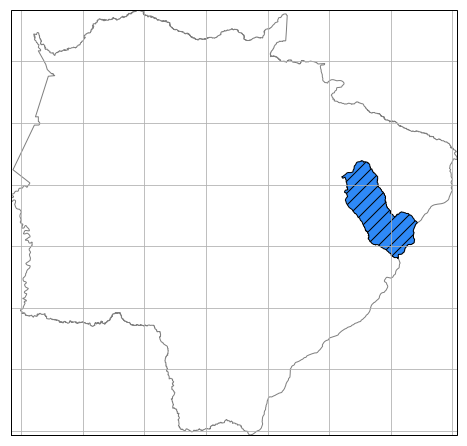

In [11]:
lonlat_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=lonlat_crs)
shp = shapely.geometry.shape(shapeMS['geometry'])
shp2 = shapely.geometry.shape(shapeTL['geometry'])
ax.add_geometries([shp], lonlat_crs, facecolor='none',alpha=0.5,edgecolor='black')
ax.add_geometries([shp2], lonlat_crs, color='#2e89f7', edgecolor='k', hatch='//')
ax.set_extent((bboxMS[0], bboxMS[2], bboxMS[1], bboxMS[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs)
plt.show()

In [15]:
feature_collection = dl.metadata.search(products='landsat:LC08:01:RT:TOAR', start_time='2018-08-01', end_time='2018-08-31', cloud_fraction=0.1, limit=10, geom=shapeTL['geometry'])
print (len(feature_collection['features']))

ids = [f['id'] for f in feature_collection['features']]
arr, meta = dl.raster.ndarray(
    ids,
    bands=['red', 'green', 'blue', 'alpha'],
    scales=[[0,2048], [0, 2048], [0, 2048], None],
    data_type='Byte',
    resolution=60,
    cutline=shapeTL['geometry'],
)

3


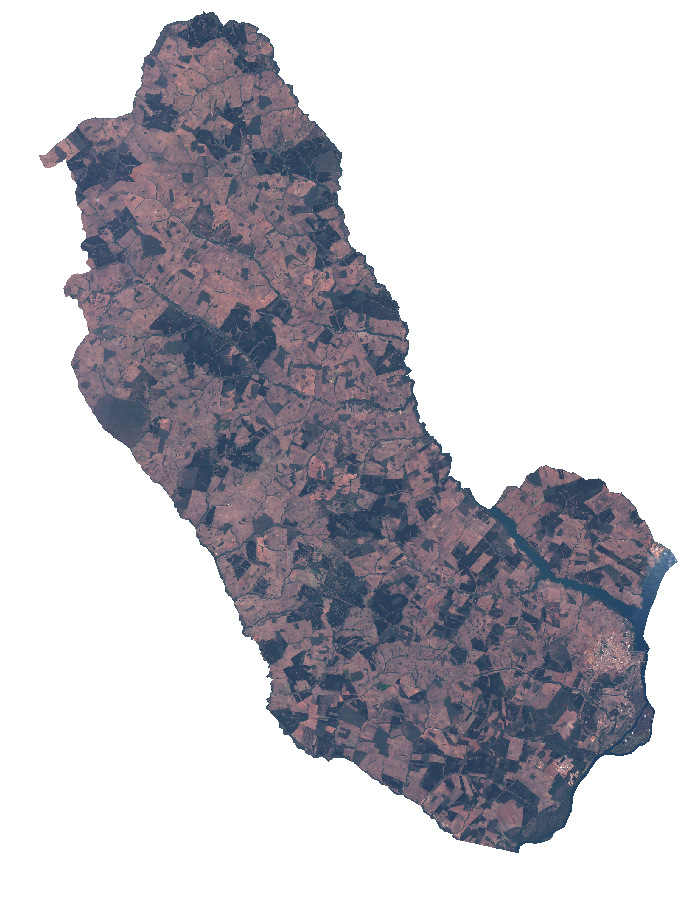

In [16]:
plt.figure(figsize=[16,16])
plt.axis('off')
plt.imshow(arr)

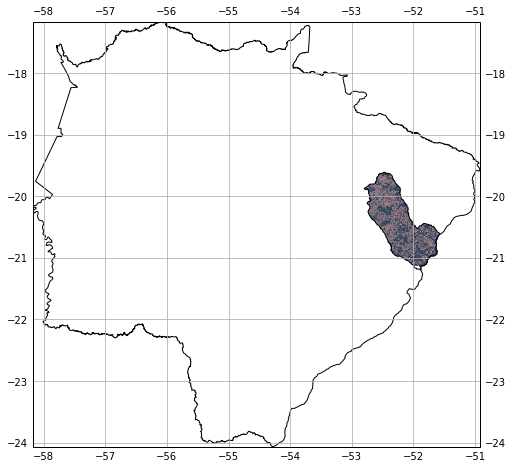

In [17]:
img_extent = (bboxTL[0], bboxTL[2], bboxTL[1], bboxTL[3])
lonlat_crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(projection=lonlat_crs)
shp = shapely.geometry.shape(shapeMS['geometry'])
shp2 = shapely.geometry.shape(shapeTL['geometry'])
ax.add_geometries([shp], lonlat_crs, facecolor='none',edgecolor='black')
ax.add_geometries([shp2], lonlat_crs, facecolor='none',edgecolor='black')
ax.imshow(arr, origin='upper', extent=img_extent, transform=lonlat_crs)
ax.set_extent((bboxMS[0], bboxMS[2], bboxMS[1], bboxMS[3]), crs=lonlat_crs)
ax.gridlines(crs=lonlat_crs,draw_labels=True)
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
plt.show()